In [40]:
# importing libraries
import cv2
import matplotlib.pyplot as plt

In [41]:
# importing ssd_mobilenet configuration model and its weight
config_file = "ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model = "frozen_inference_graph.pb"

In [42]:
# OpenCV’s dnn  module to load a pre-trained object detection network.
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [43]:
classLabels = [[]] ## empty list of python
file_name = 'Labels.txt'
with open(file_name,'rt') as fpt: ## opening a coco file(contains 80 labels)
    classLabels = fpt.read().rstrip('\n').split('\n')
    #classLabels.append(fpt.read())

In [44]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [45]:
print(len(classLabels))

80


In [46]:
model.setInputSize(320,320) ## configuration file contains the input file size
model.setInputScale(1.0/127.5) ## 255/2 = 127.5
model.setInputMean((127.5,127.5,127.5)) ## mobilenet => [-1,1]
model.setInputSwapRB(True) 

<dnn_Model 00000195842F4B90>

# read an image

In [47]:
img = cv2.imread("sample.jpg") ## read a image

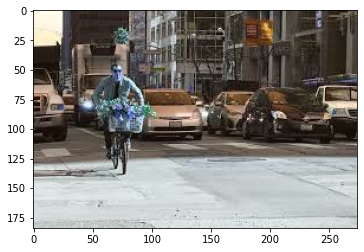

In [48]:
plt.imshow(img) ## bgr

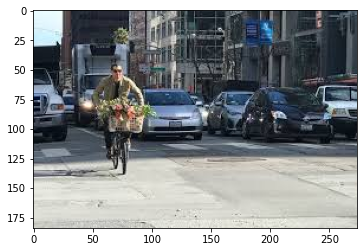

In [49]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) ## convert bgr to rgb

In [50]:
ClassIndex, confidence, bbox = model.detect(img,confThreshold=0.5) ## image thresholding

In [51]:
print(ClassIndex)

[[ 3]
 [ 1]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [10]
 [ 2]
 [ 3]
 [ 3]]


In [52]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0,255,0), thickness=3)

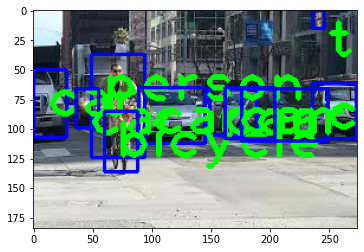

In [53]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# webcam

In [ ]:
cap = cv2.VideoCapture(0)


if not cap.isOpened():
    cap = cv2.VideoCapture(1)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()
    
    ClassIndex, confidence, bbox = model.detect(frame,confThreshold=0.5)
    #print(ClassIndex)
    
    if(len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(),bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame,boxes,(255, 0, 0), 2) # rectangle frame box
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0, 255, 0), thickness=3 )
    
    # show img in frame            
    cv2.imshow('Object Detection',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
# release webcam        
cap.release()
cap.destroyAllWindows()